<a href="https://colab.research.google.com/github/Asit-1121130118/practice-projects/blob/master/ANN_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ANN Churn model**

***Importing the library***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# import the datasets
data = pd.read_csv('/content/drive/MyDrive/datasets/Churn_Modelling.csv')

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# separating the x and y data
x = data.iloc[:, 3:13]
y = data.iloc[:, 13]

In [6]:
# checking for any missing values
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
# converting the geography and gender fetures to the int format
# calling the get_dummies function
geography = pd.get_dummies(x['Geography'], drop_first = True)
gender = pd.get_dummies(x['Gender'], drop_first= True)

In [8]:
x = pd.concat([x, geography, gender], axis = 1)
x = x.drop(['Geography', 'Gender'], axis = 1)

In [9]:
print(x.shape)
x.head()

(10000, 11)


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


***Building the Model***

In [10]:
# splitting the x and y values and scaling them
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.8, random_state = 0)

In [11]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

**Tensorflow**


***Building the ANN model***

In [12]:
# import the library
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout 

In [24]:
# making input, hidden and output layer
model = Sequential()
model.add(Dense(10, kernel_initializer = 'he_uniform', activation = 'relu', input_dim=11))
model.add(Dense(10, kernel_initializer= 'he_uniform', activation= 'relu'))
model.add(Dense(10, kernel_initializer= 'he_uniform', activation= 'relu'))
model.add(Dense(1, kernel_initializer= 'glorot_uniform', activation= 'sigmoid'))

In [25]:
model.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])

In [26]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 10)                120       
_________________________________________________________________
dense_14 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_15 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 11        
Total params: 351
Trainable params: 351
Non-trainable params: 0
_________________________________________________________________


In [27]:
model_history=model.fit(xtrain, ytrain,validation_split=0.33, batch_size = 100,epochs = 100)

Epoch 1/100
14/14 [==============================] - 0s 12ms/step - loss: 1.0494 - accuracy: 0.2584 - val_loss: 0.9634 - val_accuracy: 0.2678
Epoch 2/100
14/14 [==============================] - 0s 3ms/step - loss: 0.9172 - accuracy: 0.2860 - val_loss: 0.8553 - val_accuracy: 0.3177
Epoch 3/100
14/14 [==============================] - 0s 3ms/step - loss: 0.8237 - accuracy: 0.3406 - val_loss: 0.7779 - val_accuracy: 0.3812
Epoch 4/100
14/14 [==============================] - 0s 3ms/step - loss: 0.7561 - accuracy: 0.4235 - val_loss: 0.7234 - val_accuracy: 0.4887
Epoch 5/100
14/14 [==============================] - 0s 3ms/step - loss: 0.7067 - accuracy: 0.5482 - val_loss: 0.6815 - val_accuracy: 0.5976
Epoch 6/100
14/14 [==============================] - 0s 3ms/step - loss: 0.6683 - accuracy: 0.6191 - val_loss: 0.6468 - val_accuracy: 0.7005
Epoch 7/100
14/14 [==============================] - 0s 3ms/step - loss: 0.6372 - accuracy: 0.6856 - val_loss: 0.6177 - val_accuracy: 0.7534
Epoch 8/100


In [28]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


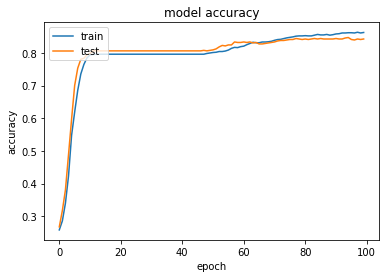

In [29]:
# visualising the accuracy vs. validation accuracy plot
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

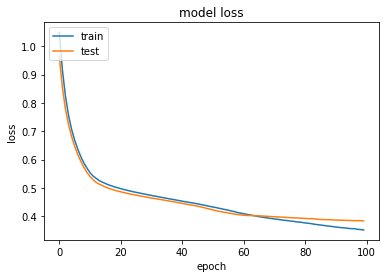

In [30]:
# visualising the train and test loss
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [31]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = model.predict(xtest)
y_pred = (y_pred > 0.5)

In [32]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [34]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_pred)
cm

array([[6028,  336],
       [ 926,  710]])

In [35]:
# calculate the accuracy
from sklearn.metrics import accuracy_score

print(accuracy_score(ytest, y_pred))

0.84225
